<IPython.core.display.Javascript object>


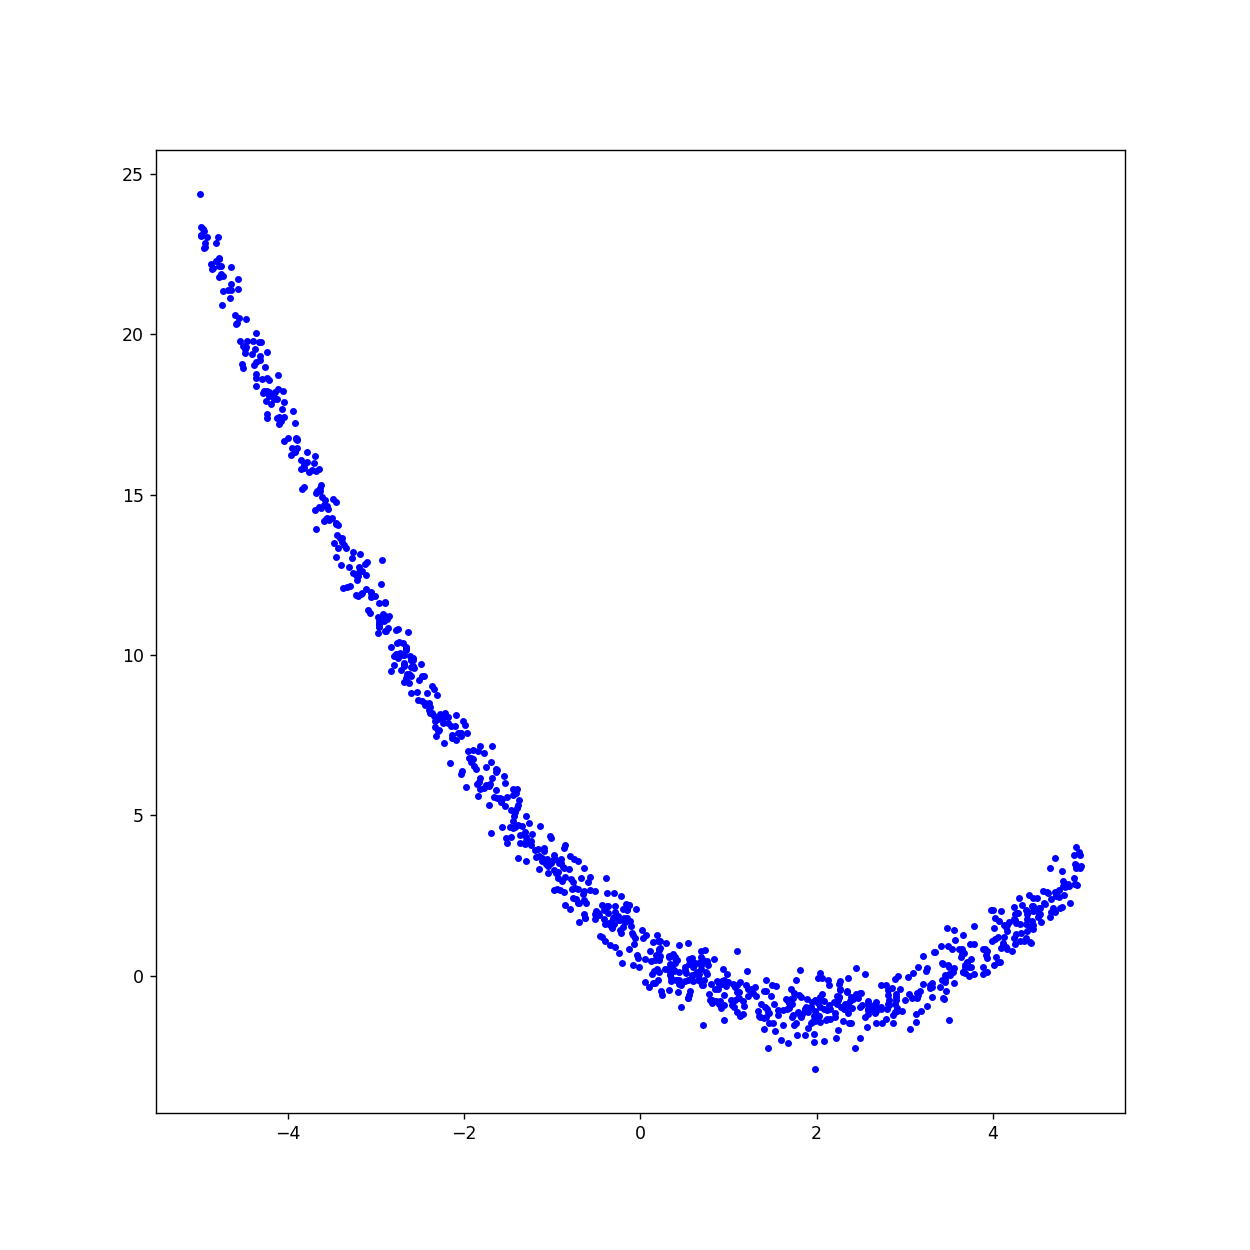

<IPython.core.display.Javascript object>


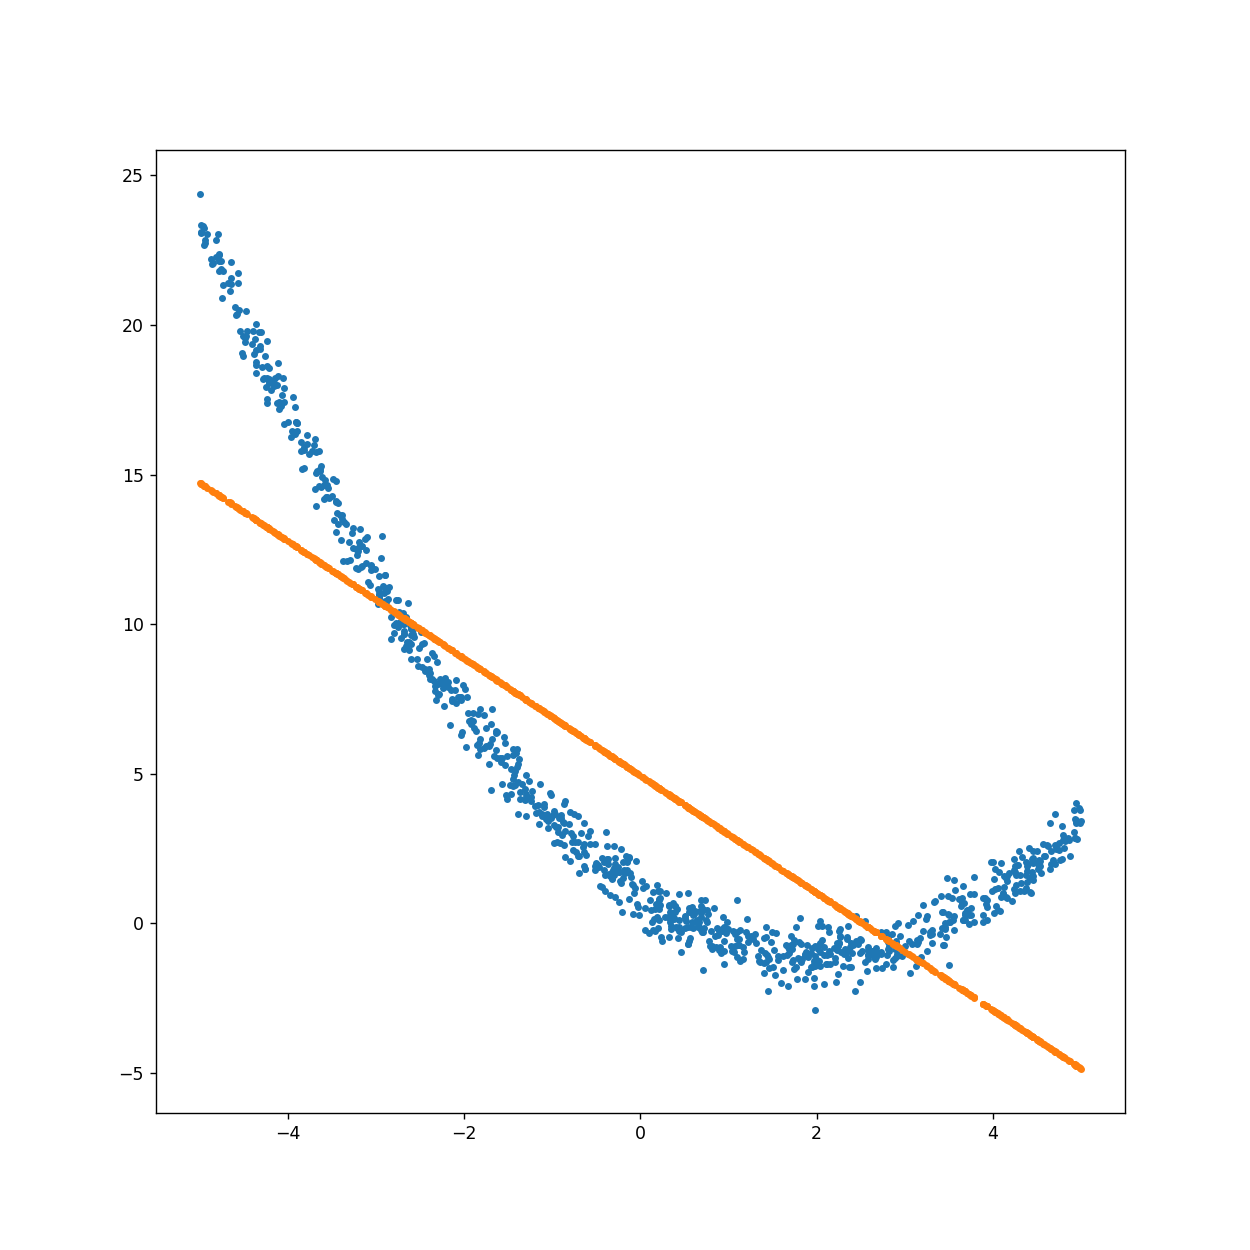

<IPython.core.display.Javascript object>


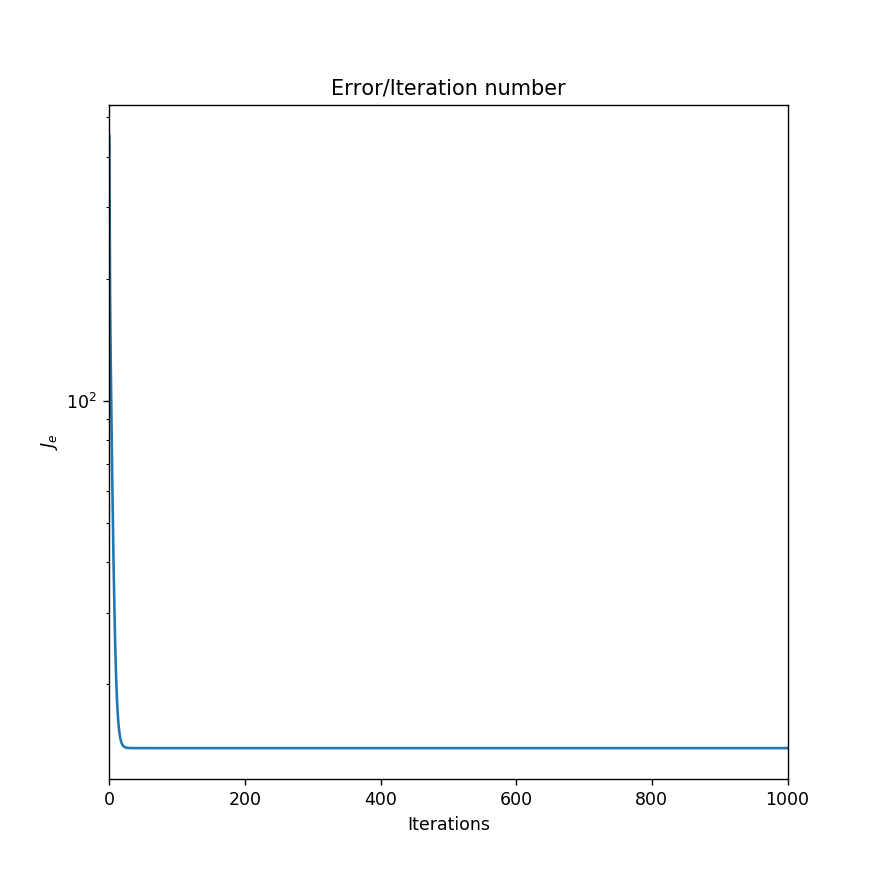

a1_opt: 4.939361968021297
a2_opt: -1.9593032431040318
a1_gd: 4.939361968021294
a2_gd: -1.9593032431040303


<IPython.core.display.Javascript object>


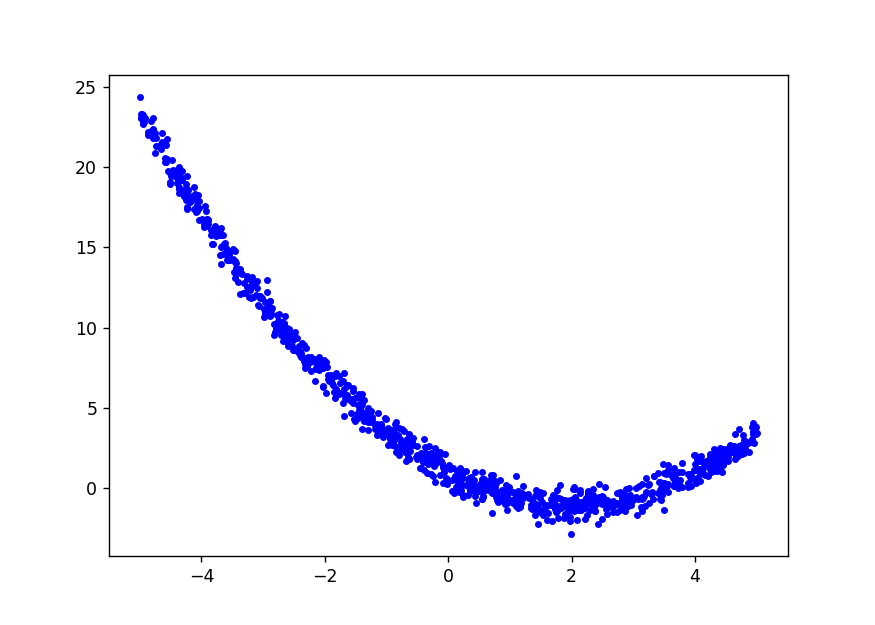

In [2]:
#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook
#importando os arquivos do training.csv.

df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')

#conta a quantidade de exemplos
M = int(len(x))

#vetor de 1's.
x0 = np.ones((M,1))

# Adequando os valores de X e Y em uma distribuição de 0 a 1.
x1 = np.reshape(x,(M,1))
y = np.reshape(y,(M,1))

# Concatenação do vetores 
X = np.c_[x0, x1]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x0 + a_opt[1, 0]*x1
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))
# Gradiente descendente por batelada.

# Taxa de aprendizado
alpha = 0.08

# Maximum number of iterations.
n_iterations = M

# Inicialização dos parâmetros.
a = np.zeros((2,1))
a[0] = -10;
a[1] = -7;

# Vetor para armazenar os parâmetros.
a_hist = np.zeros((2, n_iterations+1))

# Atualizando o valor do vetor.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# vetor de erros.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# loop do GD por batelada.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))

#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    
    gradients = -2/M * X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1
# plotando os gráfico de x vs. y e x vs. h

fig = plt.figure(figsize=(10,10))
plt.plot(x, y,'.')
plt.plot(x, yhat,'.')

fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('$J_e$')
plt.title('Error/Iteration number')
plt.show()
#valores calculado e valores obtidos

print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

# usar o predicting.csv para calcular o erro quadrático médio

#importanto os dados
df = pd.read_csv('training.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(7,5))
plt.plot(x, y, 'b.')
